In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video_path = "/home/kim/Desktop/AI_cours/data/greenball.mp4"
test_img_path = "/home/kim/Desktop/AI_cours/data/lines.png"

In [11]:
def track(image):
    # 1) 노이즈 제거 >> 블러(Gaussian blur)
    blur = cv2.GaussianBlur(image,(5,5),0) # 커널 사이즈 (5,5), 표준편차 :0 자동 계산
    hsv = cv2.cvtColor(blur,cv2.COLOR_BGR2HSV)
    # hsv(hue 색상, saturation 채도, value 명도)
    # hsv는 조명이 바뀌어도 색상 찾기가 더 쉬움(추척할 때 바꾸는 경우가 많음)

    # 초록색 범위 설정(필요에 따라 값 조정이 필요)
    lower_green = np.array([20,170,200]) # 연한 녹색에서 진한 녹색 범위 설정
    upper_green = np.array([40,200,220]) # array([ 33.13242894, 180.39071287, 211.6121371 ])

    mask = cv2.inRange(hsv, lower_green, upper_green) # 3개의 채널이 전부 다 만족할 경우 255, 아닌 경우 0 >> 흑백 이미지

    bmask = cv2.GaussianBlur(mask, (5,5), 0)
    # bmask 조금 더 부드럽게 함

    moments = cv2.moments(bmask) # key-value {}로 저장 (m00: ...  면적(area))

    m00 = moments['m00'] # 전체 면적

    centroid_x, centroid_y = None,None

    if m00 != 0: # 만약 면적이 0이 아니면
        centroid_x = int(moments['m10']/m00) # 한 영역의 중심 x 좌표
        centroid_y = int(moments['m01']/m00) # 한 영역의 중심 y 좌표

    # 기본값: 중심 없음
    # >> 초록색을 못찾으면
    # 왜 -1을 썼나요? 유효하지 않은 좌표(x,y)
    # >> 즉 이미지 화면에 보이는 것 (0,0)-(wh)
    crt = (-1,-1)
    if centroid_x != None and centroid_y != None:
        crt = (centroid_x, centroid_y) # 이미지 위에 중심점 표시
        cv2.circle(image, crt, 4, (0,0,0),-1)
    
    cv2.imshow('tracking',image)

    return crt


In [13]:
if __name__ == '__main__':
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print('동영상을 열 수 없습니다.')
    else:
        frame_idx = 0

        while True:
            okay, image = cap.read()

            if not okay:
                print('영상이 끝났습니다.')
                break

            ctr = track(image)
            print(f'Frame {frame_idx}: centroid = {ctr}')

            frame_idx += 1

            if cv2.waitKey(41) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

Frame 0: centroid = (458, 149)
Frame 1: centroid = (456, 151)
Frame 2: centroid = (455, 151)
Frame 3: centroid = (457, 153)
Frame 4: centroid = (457, 155)
Frame 5: centroid = (459, 149)
Frame 6: centroid = (456, 150)
Frame 7: centroid = (458, 149)
Frame 8: centroid = (461, 146)
Frame 9: centroid = (460, 143)
Frame 10: centroid = (460, 143)
Frame 11: centroid = (459, 145)
Frame 12: centroid = (459, 143)
Frame 13: centroid = (461, 141)
Frame 14: centroid = (463, 139)
Frame 15: centroid = (466, 138)
Frame 16: centroid = (467, 136)
Frame 17: centroid = (467, 133)
Frame 18: centroid = (471, 132)
Frame 19: centroid = (472, 132)
Frame 20: centroid = (475, 131)
Frame 21: centroid = (475, 133)
Frame 22: centroid = (475, 134)
Frame 23: centroid = (473, 135)
Frame 24: centroid = (473, 134)
Frame 25: centroid = (471, 137)
Frame 26: centroid = (472, 140)
Frame 27: centroid = (471, 144)
Frame 28: centroid = (470, 147)
Frame 29: centroid = (467, 151)
Frame 30: centroid = (465, 150)
Frame 31: centroid

In [4]:
path = '/home/kim/Pictures/Screenshots/ball.png'
img = cv2.imread(path)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hsv.mean(axis=(0,1))



array([ 33.13242894, 180.39071287, 211.6121371 ])

In [ ]:
img = cv2.imread(path)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_green = np.array([10,20,20]) # 연한 녹색에서 진한 녹색 범위 설정
upper_green = np.array([170,255,255])
mask = cv2.inRange(hsv, lower_green, upper_green)
moments = cv2.moments(mask)

In [42]:
moments

{'m00': 117092940.0,
 'm10': 52306865820.0,
 'm01': 40493509125.0,
 'm20': 31676576654670.0,
 'm11': 18618535295010.0,
 'm02': 16733902262895.0,
 'm30': 2.174236750652042e+16,
 'm21': 1.14354428336064e+16,
 'm12': 7746620085487140.0,
 'm03': 7621042330642875.0,
 'mu20': 8310452173454.613,
 'mu11': 529583489868.5399,
 'mu02': 2730288712355.93,
 'mu30': 167284856843984.38,
 'mu21': 7790142464444.0,
 'mu12': -94906210369172.0,
 'mu03': -54333876963967.055,
 'nu20': 0.0006061264463524692,
 'nu11': 3.862540233205159e-05,
 'nu02': 0.00019913479557979639,
 'nu30': 1.1275345351935168e-06,
 'nu21': 5.250717147057776e-08,
 'nu12': -6.396874876450036e-07,
 'nu03': -3.662215687876913e-07}

In [38]:
hsv.shape

(601, 940, 3)

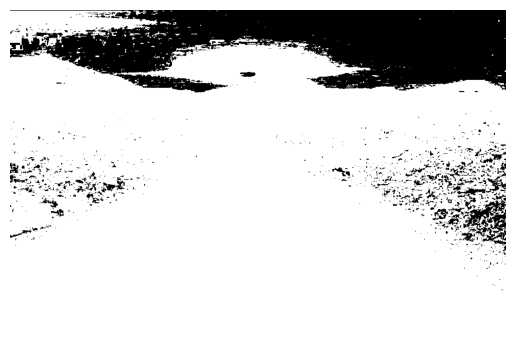

In [39]:
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()